# Group 48's Final Project
---

## Introduction:

Our group has chosen to look at datasets pretaining to police activity. What we were looking for in order to determine which was "the best neighborhood in Pittsburgh" was to find the one with the least police activity. Typically, the less police activity there is, the less crime and therefore the safer the neighborhood, hence why we went this route. We were initially looking to see how "bike friendly" each neighborhood was, but sadly the datasets that were available did not provide us with enough information to work with. From there we decided to turn to looking at fires or something related to fire in each neighborhood, but similar to the bikes, there wasn't enough data that pretained to what we were looking for. From the topic of fires, we then switched and fully settled on something simiar: *police activity.* 

---

## The Metric:

Our metric deals with looking at police activity, which can be anything from small crimes to full on incidents, in order to determine which neighborhood in Pittsburgh is the best. The datasets in which we are using deal with the following:

* Non Traffic Citations - Non-traffic citations (NTCs, also known as "summary offenses") which document low-level criminal offenses where a law enforcement officer or other authorized official issued a citation in lieu of arrest. 
* Police Incident Blotter - A list of incidents such as murders, identity theft, drug possession, vehicle theft, etc... that required police interfering
* Arrest Data - Information on people taken into custody by City of Pittsburgh police officers.

Essentially, what we are looking to measure is how often police have to intervene within each Pittsburgh neighborhood. We are looking to find the neighborhood with the least police interference, as less interference by the police most likely means the neigborhood is more "peaceful" and more safe to live in. 

---

## Arrest Data Metric:

The dataset for arrests in Pittsburgh neighborhoods was pretty enlightening.

In [3]:
# importing the fun stuff
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Let's get a look at the data for arrests in Pittsburgh.

In [2]:
# reading the csv
arrests = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")

# making our first data table
table = pd.DataFrame(arrests)
display(table)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54892,2047012,22040002,16.0,M,B,2022-03-18T09:25:00,"600 Block 1ST AV PITTSBURGH, PA 15212",2702 Aggravated Assault. / 5503(a)(4) DISORDER...,"500 Block CRANE AV PITTSBURGH, PA 15216",Beechview,6,1916.0,4.0,5.0,-80.020511,40.417064
54893,2047013,22045033,61.0,M,W,2022-04-08T06:30:00,"600 Block 1st AV Pittsburgh, PA 15219",4303 General Lighting Requirements. / 13(a)(32...,"Paulson AV & Dunmore ST Pittsburgh, PA 15206",Lincoln-Lemington-Belmar,5,1203.0,9.0,2.0,-79.901200,40.468866
54894,2047014,22043177,14.0,F,B,2022-03-23T13:30:00,"600 Block 1ST AV PITTSBURGH, PA 15219",13(a)(31) Marijuana: Possession Small Amount,"100 Block PARKFIELD AV PITTSBURGH, PA 15210",Carrick,3,2904.0,NaN,NaN,0.000000,0.000000
54895,2047015,22044451,16.0,F,B,2022-03-25T13:45:00,Zone 2,2702 Aggravated Assault. / 5503(a)(4) DISORDER...,Zone 6,NaN,6,NaN,NaN,NaN,NaN,NaN


Um, maybe a little *too much* data. Let's cut it down to size and just look at the neighborhoods in question, here.

In [9]:
arrests = arrests['INCIDENTNEIGHBORHOOD']

neighborhoods = pd.DataFrame(arrests)
display(neighborhoods)

,INCIDENTNEIGHBORHOOD
0,Bloomfield
1,Outside City
2,Westwood
3,East Allegheny
4,Crafton Heights
...,...
54892,Beechview
54893,Lincoln-Lemington-Belmar
54894,Carrick
54895,NaN


Nice. Let's graph it.

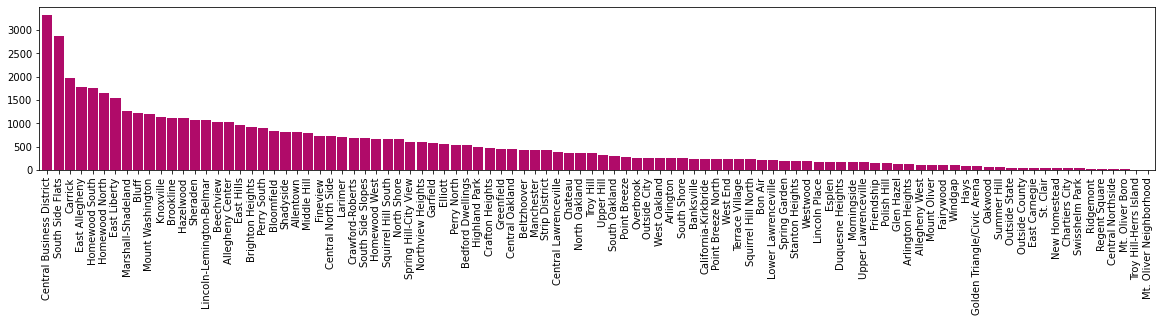

In [5]:
num_arrests = arrests.loc[:, "INCIDENTNEIGHBORHOOD"]

arrestdict = dict()

for INCIDENTNEIGHBORHOOD in num_arrests:
    if INCIDENTNEIGHBORHOOD not in arrestdict:
        arrestdict[INCIDENTNEIGHBORHOOD] = 1
    else:
        arrestdict[INCIDENTNEIGHBORHOOD] = arrestdict[INCIDENTNEIGHBORHOOD] + 1

plt.figure(figsize=(20, 3))  # width:20, height:3
arrests["INCIDENTNEIGHBORHOOD"].value_counts().plot(kind='bar', color="#b00b69", width=0.9)
plt.show()

We can see the exact number if we do a little more with the data.

In [8]:
arreststuff = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f", index_col="INCIDENTNEIGHBORHOOD", parse_dates=True)
data = arreststuff.iloc[:,8] 
data.groupby('INCIDENTNEIGHBORHOOD').count().sort_values(ascending= False)

INCIDENTNEIGHBORHOOD
Central Business District    3332
South Side Flats             2866
Carrick                      1981
East Allegheny               1786
Homewood South               1753
                             ... 
Regent Square                  28
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTLOCATION, Length: 98, dtype: int64

According to the data, Mt. Oliver Neighborhood has the lowest number of arrests, making it my nomination for the best neighborhood in Pittsburgh. Contrary to my previous belief, Mt. Oliver Neighborhood is not the same as Mount Oliver or Mt. Oliver Boro.

---
## Incident Data Metric

Lets take a look at the data:

In [12]:
#import pandas
import pandas as pd

# read in incidents.csv
incidents = pd.read_csv("https://data.wprdc.org/dataset/5e6711a3-90e5-457d-8c73-445fb5f363e2/resource/391942e2-25ef-43e4-8263-f8519fa8aada/download/archive-police-blotter.csv",low_memory=False)

df = pd.DataFrame(incidents)
display(df)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,HIERARCHYDESC,OFFENSES,INCIDENTTRACT,X,Y
0,2075487,5000381,6,1/1/2005 8:00,"5400 Block NORTHUMBERLAND ST PITTSBURGH, PA",N,Squirrel Hill North,4,MOTOR THEFT (OTHER)-PLATE ONLY,3921 Theft by Unlawful Taking or Disposition.,1401.0,-79.934027,40.438870
1,2075783,5001279,7,1/3/2005 2:00,"PARKVIEW PITTSBURGH, PA",N,Squirrel Hill North,4,MTR VEH THEFT (AUTO),3921 Theft by Unlawful Taking or Disposition.,407.0,0.000000,0.000000
2,2075786,5001488,7,1/3/2005 17:00,"CROSBY AND PAULINE & PITTSBURGH, PA",N,Squirrel Hill North,3,MOTOR VEH THEFT/TRUCK-BUS,3921 Theft by Unlawful Taking or Disposition.,1907.0,0.000000,0.000000
3,2076278,5002628,7,1/5/2005 19:30,"1100 Block COLFAX ST PITTSBURGH, PA",N,Squirrel Hill North,1,MTR VEH THEFT (AUTO),3921 Theft by Unlawful Taking or Disposition.,2102.0,-80.024329,40.462542
4,2076279,5002647,7,1/5/2005 20:20,"ALDER/SHADY & PITTSBURGH, PA",N,Shadyside,4,MTR VEH THEFT (AUTO),3921 Theft by Unlawful Taking or Disposition.,705.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495246,2777650,15179836,10,9/20/2015 18:33,"1400 Block Brookline BL Pittsburgh, PA 15226",Y,Brookline,6,HARRASSMENT/THREAT/ATTEMPT/PHY,"2709(a)(1) Harassment by Physical Contact, or ...",3206.0,-80.007850,40.392365
495247,2779439,15184891,6,9/27/2015 8:30,"3200 Block Dawson ST Pittsburgh, PA 15213",N,South Oakland,4,THEFT FROM AUTO,9489 Found Property,409.0,-79.953984,40.429913
495248,2774627,15165557,14,9/1/2015 11:55,"400 Block Tripoli ST Pittsburgh, PA 15212",Y,East Allegheny,1,CRIMINAL MISCHIEF,3304 Criminal Mischief.,2304.0,-80.002454,40.455747
495249,2774959,15167713,99,9/4/2015 6:45,"Shady AV & Walnut ST Pittsburgh, PA 15206",N,Shadyside,4,NaN,3745 Accidents Involving Damage to Unattended ...,706.0,-79.922546,40.455862


#### Narrowing it Down...

The above shows ALL of the dataframe, but what we want and are looking for is just the neighborhood names, so let's narrow it down a bit: 

In [11]:
#import pandas
import pandas as pd

# read in incidents.csv
incidents = pd.read_csv("https://data.wprdc.org/dataset/5e6711a3-90e5-457d-8c73-445fb5f363e2/resource/391942e2-25ef-43e4-8263-f8519fa8aada/download/archive-police-blotter.csv",low_memory=False)

#narrow the above down to JUST the neighborhoods, as thats what we're looking for
incidents = incidents[['INCIDENTNEIGHBORHOOD']]

#create and display the ta
df = pd.DataFrame(incidents)
display(df)

,INCIDENTNEIGHBORHOOD
0,Squirrel Hill North
1,Squirrel Hill North
2,Squirrel Hill North
3,Squirrel Hill North
4,Shadyside
...,...
495246,Brookline
495247,South Oakland
495248,East Allegheny
495249,Shadyside


### Graphing the Data Shown Above:

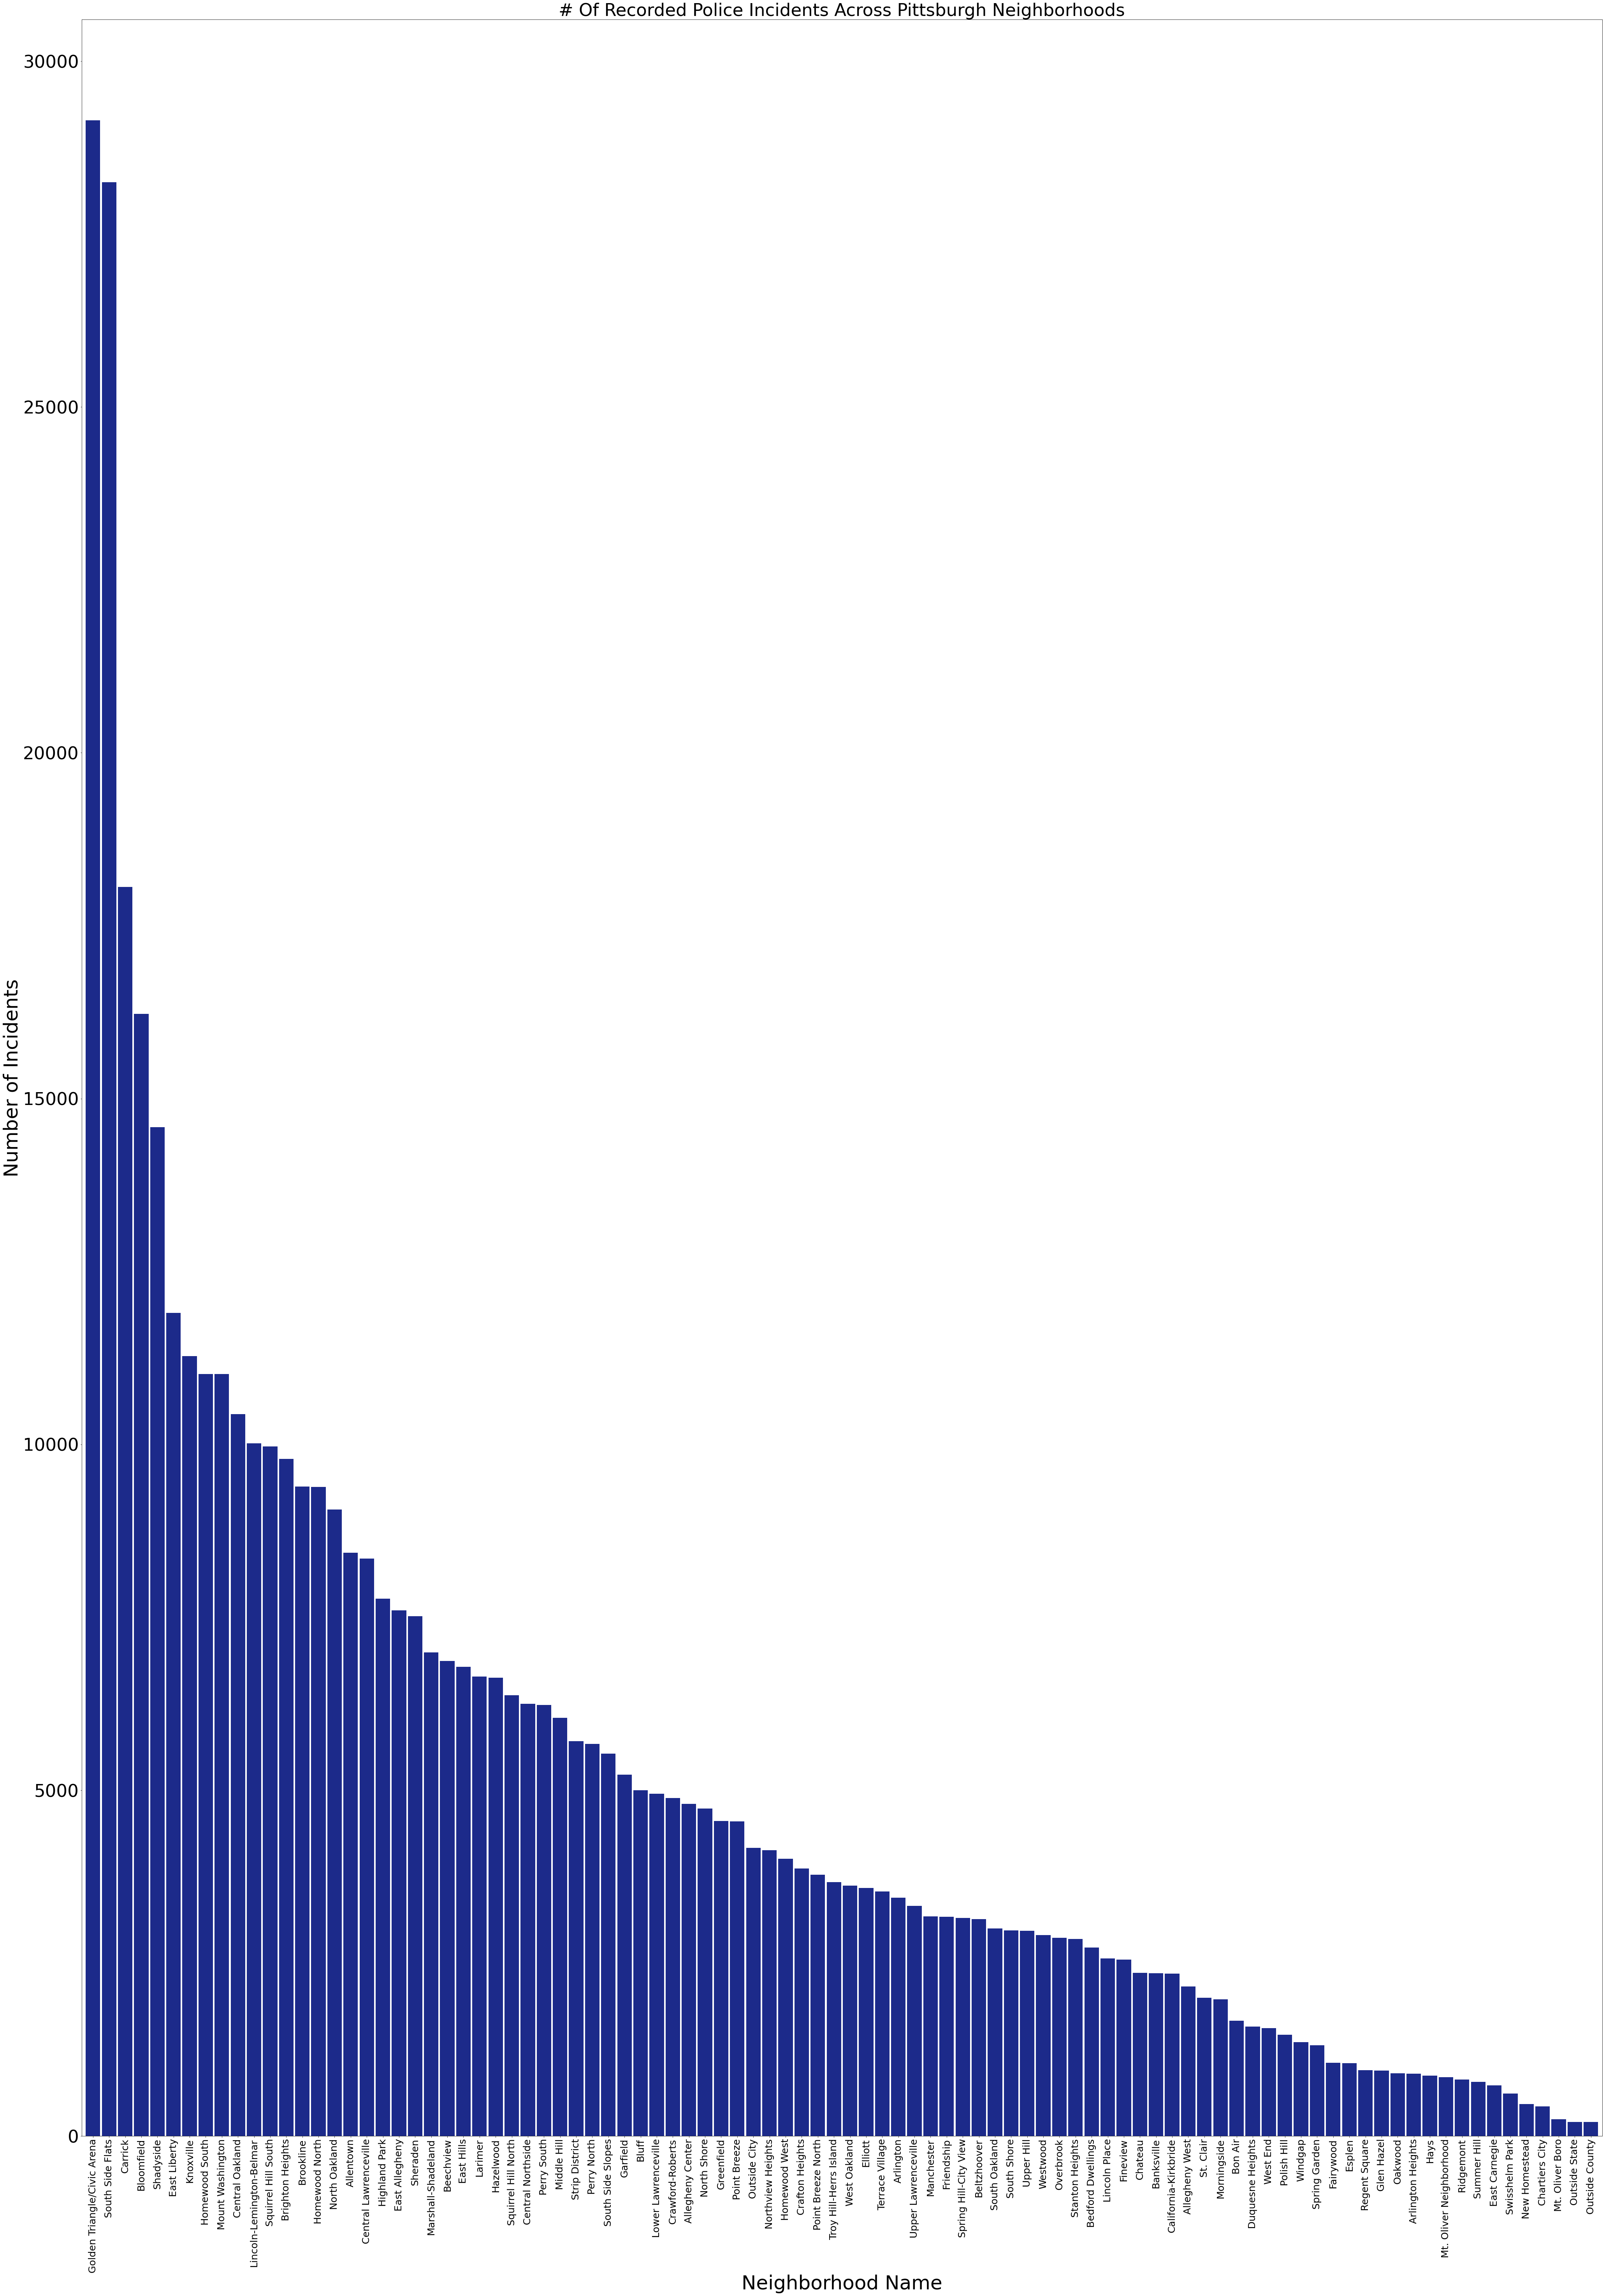

In [1]:
# Neighborhood Graph

import pandas as pd
import matplotlib.pyplot as plt

# read in incidents.csv
incidents = pd.read_csv("https://data.wprdc.org/dataset/5e6711a3-90e5-457d-8c73-445fb5f363e2/resource/391942e2-25ef-43e4-8263-f8519fa8aada/download/archive-police-blotter.csv",low_memory=False)

#plot the bars for each neighborhood 
plt.figure(figsize=(70, 100)) 
incidents["INCIDENTNEIGHBORHOOD"].value_counts().plot(kind='bar', color="#1c2a8a", width=0.9)

#label the graph
plt.title("# Of Recorded Police Incidents Across Pittsburgh Neighborhoods", fontsize = 45)

plt.xticks(fontsize = 25, rotation = "vertical")
plt.yticks(fontsize = 45)

plt.xlabel("Neighborhood Name", fontsize = 50)
plt.ylabel("Number of Incidents", fontsize = 50)

# Display graph 
plt.show() 

Its sort of hard to tell what the exact values are of each incident due to the graph's size, so lets make the number of incidents for each neighborhood a bit more apparent:

In [4]:
import pandas as pd
# read in incidents.csv

incidents = pd.read_csv("https://data.wprdc.org/dataset/5e6711a3-90e5-457d-8c73-445fb5f363e2/resource/391942e2-25ef-43e4-8263-f8519fa8aada/download/archive-police-blotter.csv", low_memory=False)

# Show the counts, now in words/Values shown in ascending order so we can see the one with the least incidents reported
# Disregard Outside County and Outside State, as they are NOT part of Pittsburgh, making it Mt. Oliver BORO (not to be confused with the many others)

incidents['INCIDENTNEIGHBORHOOD'].value_counts(ascending=True)

Outside County                   201
Outside State                    202
Mt. Oliver Boro                  239
Chartiers City                   427
New Homestead                    459
                               ...  
Shadyside                      14584
Bloomfield                     16223
Carrick                        18059
South Side Flats               28251
Golden Triangle/Civic Arena    29147
Name: INCIDENTNEIGHBORHOOD, Length: 94, dtype: int64

According to the graph, as well as the more clear list of incident counts and their respective neighborhoods shown above, there are many that only have a few incidents recorded (a few meaning in the 200-400 range). Disregarding the "Outside County" and "Outside State" bars, as they are outside of Pittsburgh and not what we are looking for, the next lowest value appears to be Mt. Oliver Boro. Based on the listed value counts and the visualized counts in the graph, it appears that the best neighborhood in terms of police activty related to reported incidents is Mt. Oliver Boro (not to be confused with Mt. Oliver, same name, different neighborhoods). 

---
## Non Traffic Citations Metric 

## Import

First I imported Pandas and Numpy in Jupiter. <br>
Next I imported matplotlib and set it plt. <br>
Then I ran into a small problem because graph wasn't displaying so I changed plot.bar to inLine then it displayed. <br>
Then I opened nonTracficCitation as a csv file but because of Jupitar set up I had to get the location url.

In [6]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inLine

nonTracficCitation = pd.read_csv('https://data.wprdc.org/datastore/dump/6b11e87d-1216-463d-bbd3-37460e539d86')

## Table
Then I setup a table to be able to help with the information. This is so I can see if I set the right columns in the graph.

In [2]:
nonTracficCitation = pd.read_csv('https://data.wprdc.org/datastore/dump/6b11e87d-1216-463d-bbd3-37460e539d86')
display(nonTracficCitation)

,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1078081,16157849,M,B,29.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
1,1078082,16157849,M,W,21.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
2,1078083,16159579,NaN,NaN,NaN,2016-08-25T11:10:00,"NORTH PARK PITTSBURGH, PA",5505 Public Drunkenness,Allegheny Center,1,2204,NaN,NaN,0.000000,0.000000
3,1078084,16159780,M,B,22.0,2016-08-25T16:42:00,"7200 Block FRANKSTOWN AV PITTSBURGH, PA","6501(a)(1) Scattering Rubbish; Any waste, dang...",Homewood South,5,1303,9.0,2.0,-79.896254,40.457329
4,1078085,16161591,F,W,22.0,2016-08-28T00:58:00,"6100 Block BERLIN WY PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,Upper Lawrenceville,2,1011,7.0,2.0,-79.946664,40.485403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12952,1100699,22047404,F,W,42.0,2022-03-30T22:55:00,"500 Block HAMOND ST PITTSBURGH, PA","2709(a)(1) Harassment by Physical Contact, or ...",Sheraden,6,2018,2.0,5.0,-80.051285,40.455153
12953,1100700,22047500,M,B,32.0,2022-03-31T02:18:00,"1700 Block E CARSON ST PITTSBURGH, PA",5503(a)(1) DISORDERLY CONDUCT - ENGAGE IN FIGH...,South Side Flats,3,1702,3.0,3.0,-79.981872,40.428593
12954,1100701,22047524,M,B,41.0,2022-03-31T03:37:00,"600 Block HOLLACE ST PITTSBURGH, PA",2709(a)(6) Harassment Communicates Repeatedly ...,Middle Hill,2,501,6.0,3.0,-79.967408,40.449953
12955,1100702,22047950,F,W,44.0,2022-03-31T18:00:00,"1200 Block QUEENSBURY ST PITTSBURGH, PA",2709(a)(5) Harassment Communicates Repeatedly ...,Westwood,6,2811,2.0,5.0,-80.048814,40.436386


## Graph Setup

I set plt. figure as fig. This will set the length fo the graph, specific x and y values. <br>
Next I set up the x and y values, this is not the same as the length and width of the graph. <br>
I also set the graph to be my favorite color which happened to be already built in. <br>
Then I set up the labels for the x and y values. <br>
Finally I used plt.show, this makes the graph display.

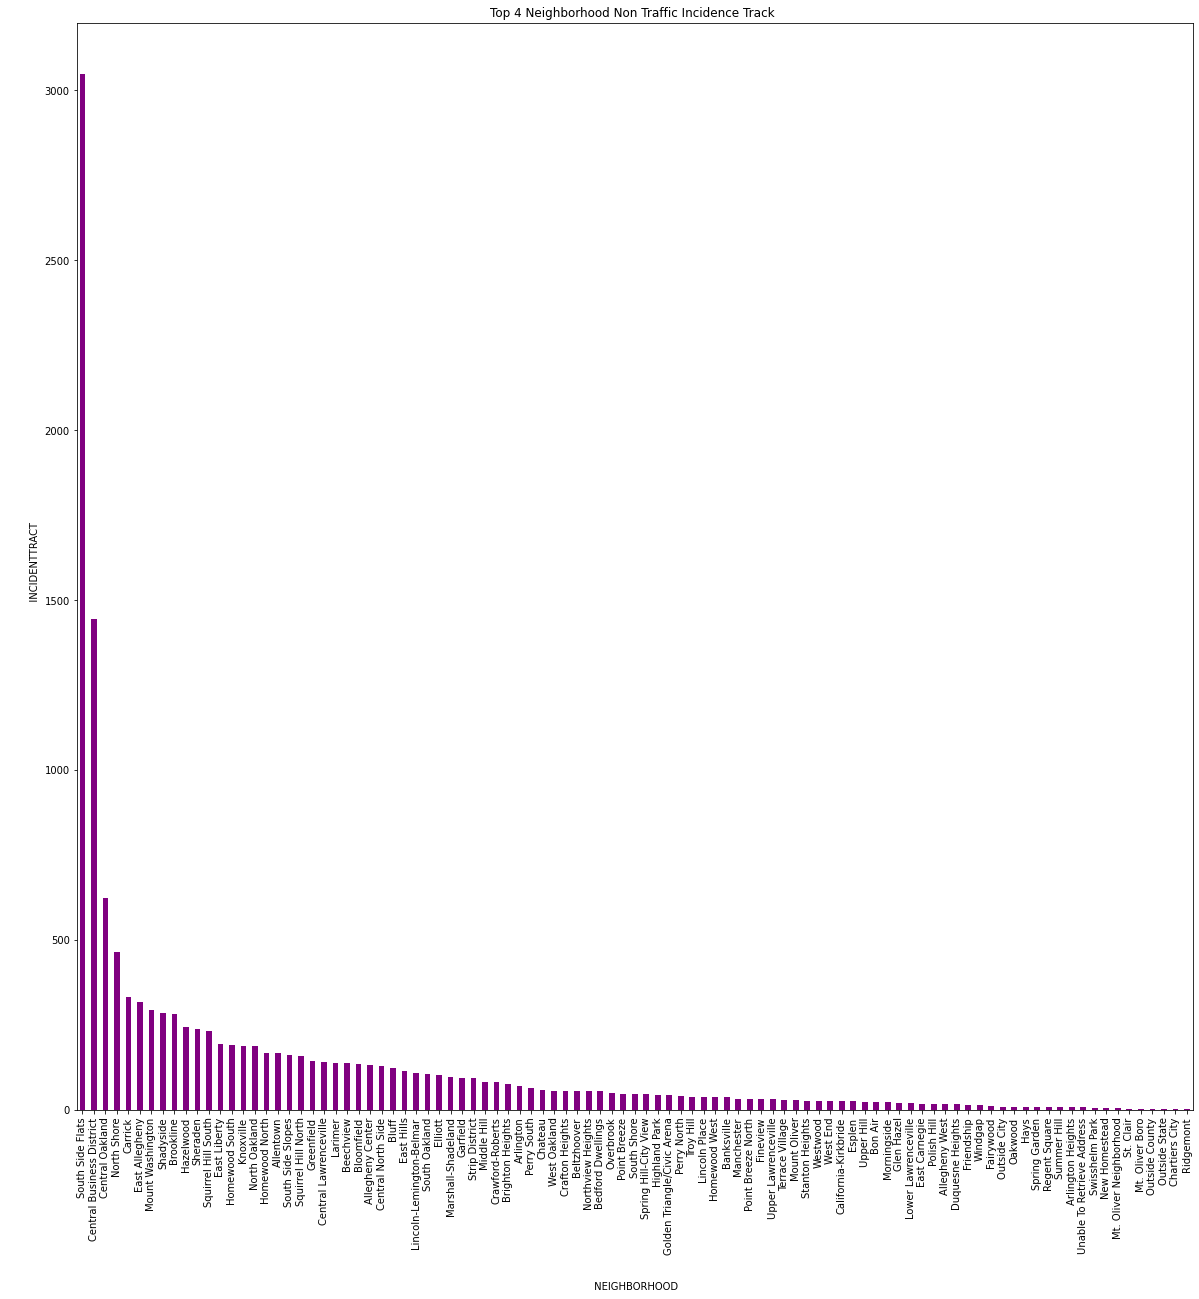

In [9]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inLine

nonTracficCitation = pd.read_csv('https://data.wprdc.org/datastore/dump/6b11e87d-1216-463d-bbd3-37460e539d86')


fig = plt.figure(figsize =(20, 20))

nonTracficCitation["NEIGHBORHOOD"].value_counts().plot(kind='bar',color="purple")
plt.title("Top 4 Neighborhood Non Traffic Incidence Track ")

plt.xlabel("\n \n NEIGHBORHOOD")

plt.ylabel("    \n \n   INCIDENTTRACT")

plt.show()

## Look  Closer

This is a closer look at the data due to the fact that there is a lot of componets. I set up a data frame with just two of the columns Neighborhood and Incident Tract. 

In [37]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inLine

nonTracficCitation = pd.read_csv('https://data.wprdc.org/datastore/dump/6b11e87d-1216-463d-bbd3-37460e539d86')

neighborTable = pd.DataFrame(nonTracficCitation )

nonTraficCitation2 = neighborTable[["NEIGHBORHOOD","INCIDENTTRACT"]]

nonTraficCitation2.groupby('NEIGHBORHOOD').value_counts(ascending=True)
display(nonTraficCitation2)

,NEIGHBORHOOD,INCIDENTTRACT
0,North Oakland,507
1,North Oakland,507
2,Allegheny Center,2204
3,Homewood South,1303
4,Upper Lawrenceville,1011
...,...,...
12952,Sheraden,2018
12953,South Side Flats,1702
12954,Middle Hill,501
12955,Westwood,2811


## Combined Data 

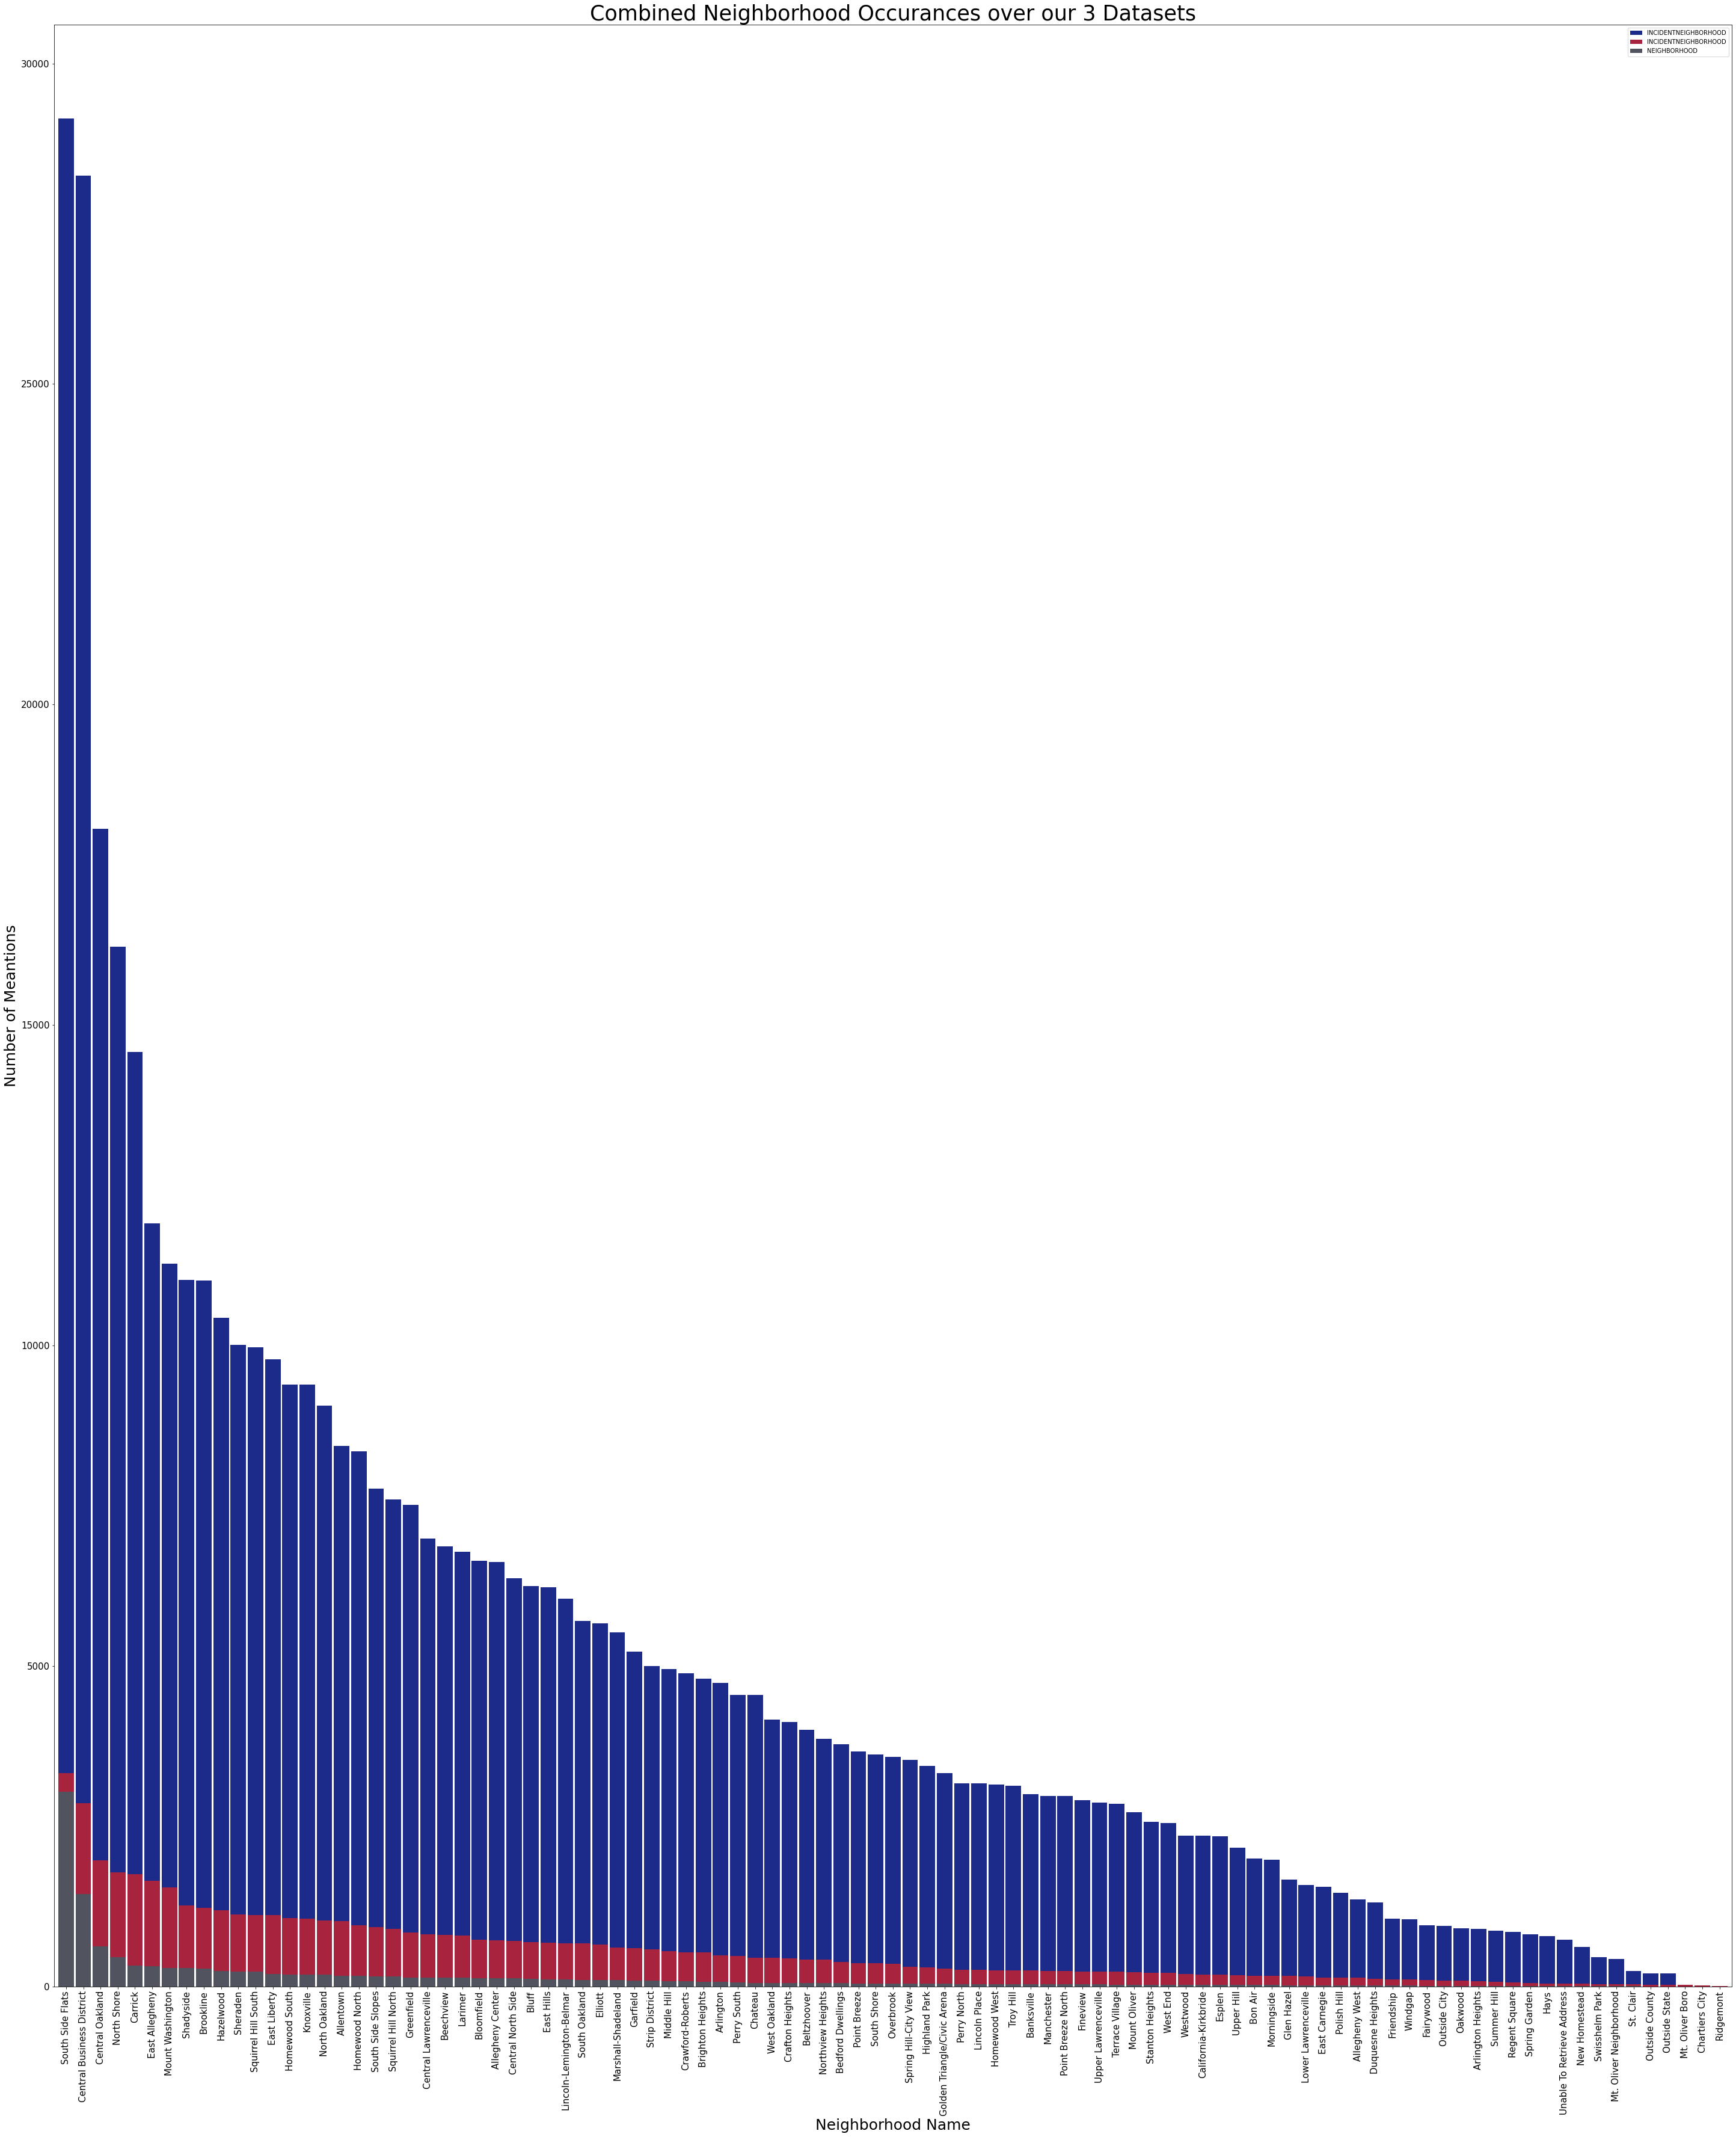

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

#load in and read .csv files
incidents = pd.read_csv("https://data.wprdc.org/dataset/5e6711a3-90e5-457d-8c73-445fb5f363e2/resource/391942e2-25ef-43e4-8263-f8519fa8aada/download/archive-police-blotter.csv", low_memory=False)
arrests = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
citations = pd.read_csv("https://data.wprdc.org/datastore/dump/6b11e87d-1216-463d-bbd3-37460e539d86")

plt.figure(figsize=(50, 60))

#labels
plt.title("Combined Neighborhood Occurances over our 3 Datasets", fontsize = 35)

plt.xticks(fontsize = 15, rotation = "vertical")
plt.yticks(fontsize = 15)

plt.xlabel("Neighborhood Name", fontsize = 25)
plt.ylabel("Number of Meantions", fontsize = 25)

# Bars 
incidents["INCIDENTNEIGHBORHOOD"].value_counts().plot(kind='bar', stacked=True, color="#1c2a8a", width=0.9)
arrests["INCIDENTNEIGHBORHOOD"].value_counts().plot(kind='bar', stacked=True, color="#a8233e", width=0.9)
citations["NEIGHBORHOOD"].value_counts().plot(kind='bar', stacked=True, color="#51535e", width=0.9)

plt.legend()

plt.show()

The graph above is stacked bar graph that shows the neighborhood counts all together from all three dataframes so that we can gain a better idea, visually, as to which neighborhood is best in terms of lowest amount of police activity.
* In Blue is the Police Incident Blotter
* In Red is the Arrest Data
* In Grey are the Non-Traffic Citations

## The Best Neighborhood:

Based on our findings, it would seem that Mt. Oliver Boro is the best neighborhood in Pittsburgh. "Chartiers City" and "Ridgemont" fall behind it in our stacked bar graph, however, not everyone's data accounted for these two neighborhoods, so Mt. Oliver Boro is the best in terms of combined lowest arrests, non-traffic citations, and noted incidents. If you are looking to live in an area where criminal incidents and police intervention are at an all-time low, Mt. Oliver Boro is the place to be.

## Conclusion:

* **Camryn's Conclusion**:
As someone who lives far East of Pittsburgh (about 5 hours), its no suprise that I've never heard of half of these neighborhoods that I collected data for. Initially, based on my own findings, it seemed that "Mt. Oliver Boro" (which was quite confusing to validate and pin down the location considering there are *two??* Mount Olivers) was the best neighborhood, as in comparison to all the other neighborhoods, it had a relitively low incident count at 239. However, when my findings were coupled with that of my group's, it appeared that a neighborhood, another that I've never heard of - (finish when we solidify final neighborhood) 

* **Zach's Conclusion:**
I have lived in the area surrounding Pittsburgh my entire life, and I had no idea how complicated everything about "Mt. Oliver" is. There's Mount Oliver, and then Mt. Oliver Neighborhood, and then Mt. Oliver Boro. I've personally never been to Mt. Oliver Neighborhood, but it seems nice. I'm personally biased and a little surprised that Central Oakland wasn't the best neighborhood. It's pretty nice here, and I don't feel like I receive enough Pitt Police phone calls to account for it being the *third highest number* on that bar graph.

* **Sitara's Conclusion:**
As someone who only moved to Pittsburgh in June of 2021 and only knew a couple of neighborhoods like Oakland. According to the graph the best neighborhood is Mount Oliver Neighborhood.The worst neighborhood is South Side Flats due to the high incident track rate. The graph surpised me because Iassumed Oakland would be the best place to live due to the fact that it is a part of the University of Pittsburgh campus.ConclusionAs someone who only moved to Pittsburgh in June of 2021 and only knew a couple ofneighborhoods like Oakland. According to the graph the best neighborhood is Mount Oliver Neighborhood.The worst neighborhood is South Side Flats due to the high incident track rate. The graph surpised me because Iassumed Oakland would be the best place to live due to the fact that it is a part of the University of Pittsburgh campus.
* 